In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pickle

In [4]:
apples_dataset = pd.read_csv('apple_quality.csv')[:-1]

In [5]:
apples_dataset = apples_dataset.drop('A_id', axis=1)

In [6]:
apples_dataset.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [7]:
apples_dataset.tail()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229255,good
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


* A_id: Apple ID для отслеживания.
* Size: Размеры Apple.
* Weight: Масса яблока.
* Sweetness: Вкус яблока.
* Crunchiness: Текстура яблока.
* Juiciness: Влажность яблока.
* Ripeness: Зрелость яблок.
* Acidity: Терпкость яблок.
* Quality: Общая оценка яблок.

In [8]:
apples_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3999 non-null   float64
 1   Weight       3999 non-null   float64
 2   Sweetness    3999 non-null   float64
 3   Crunchiness  3999 non-null   float64
 4   Juiciness    3999 non-null   float64
 5   Ripeness     3999 non-null   float64
 6   Acidity      3999 non-null   float64
 7   Quality      3999 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


In [9]:
apples_dataset.shape

(3999, 8)

In [10]:
apples_dataset.duplicated().sum()

0

In [11]:
apples_dataset['Acidity'] = apples_dataset['Acidity'].astype('float')

In [12]:
numeric_features = apples_dataset.select_dtypes(include='float')

In [13]:
apples_dataset['Quality'] = apples_dataset['Quality'].map({'good':1, 'bad': 0})

In [14]:
apples_dataset.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


# EDA

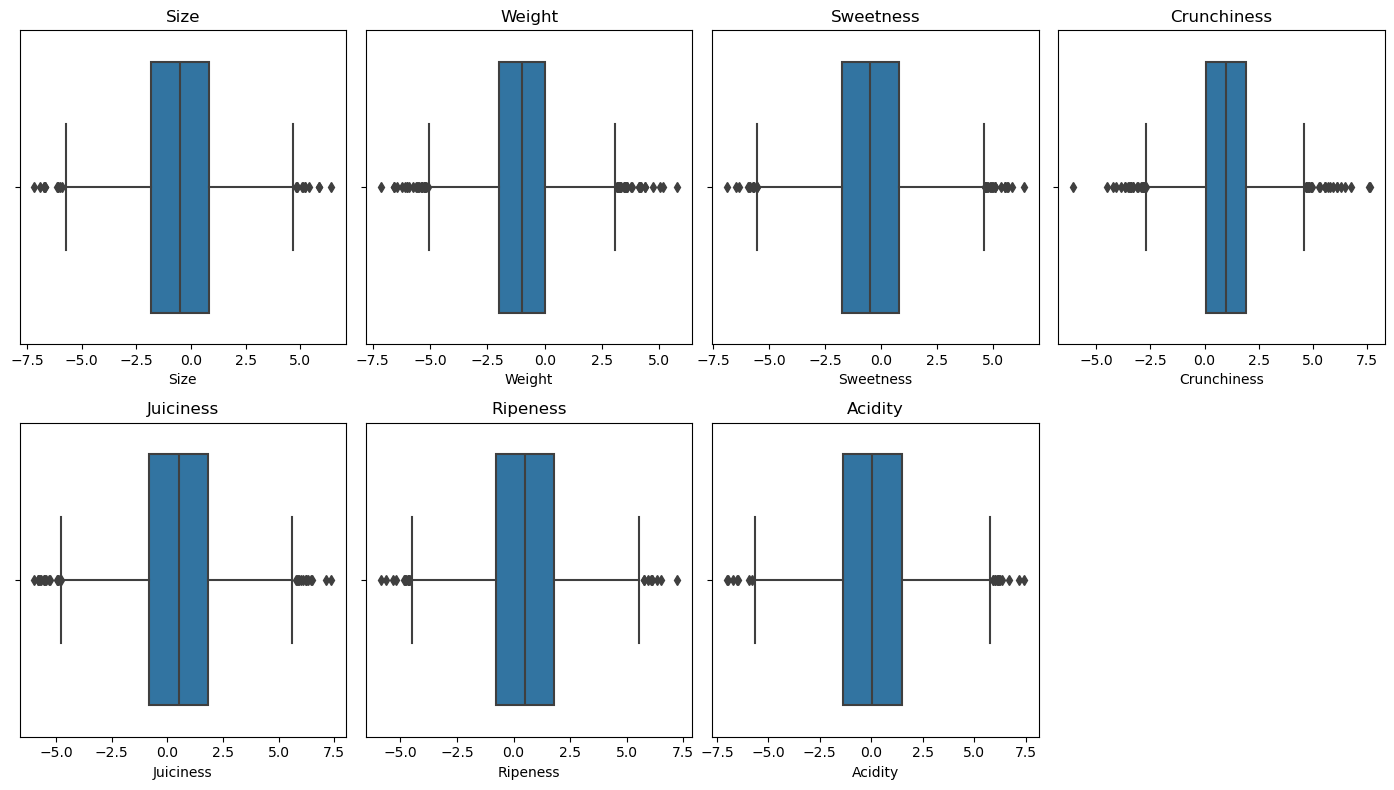

In [ ]:
plt.figure(figsize=(14, 8))
num_columns = len(numeric_features.columns)
cols = min(num_columns, 4)
rows = num_columns // cols + (num_columns % cols > 0)
for index, column_name in enumerate(numeric_features.columns):
    plt.subplot(rows, cols, index+1)
    sns.boxplot(x=column_name, data=numeric_features)
    plt.title(column_name)

plt.tight_layout()
plt.show()

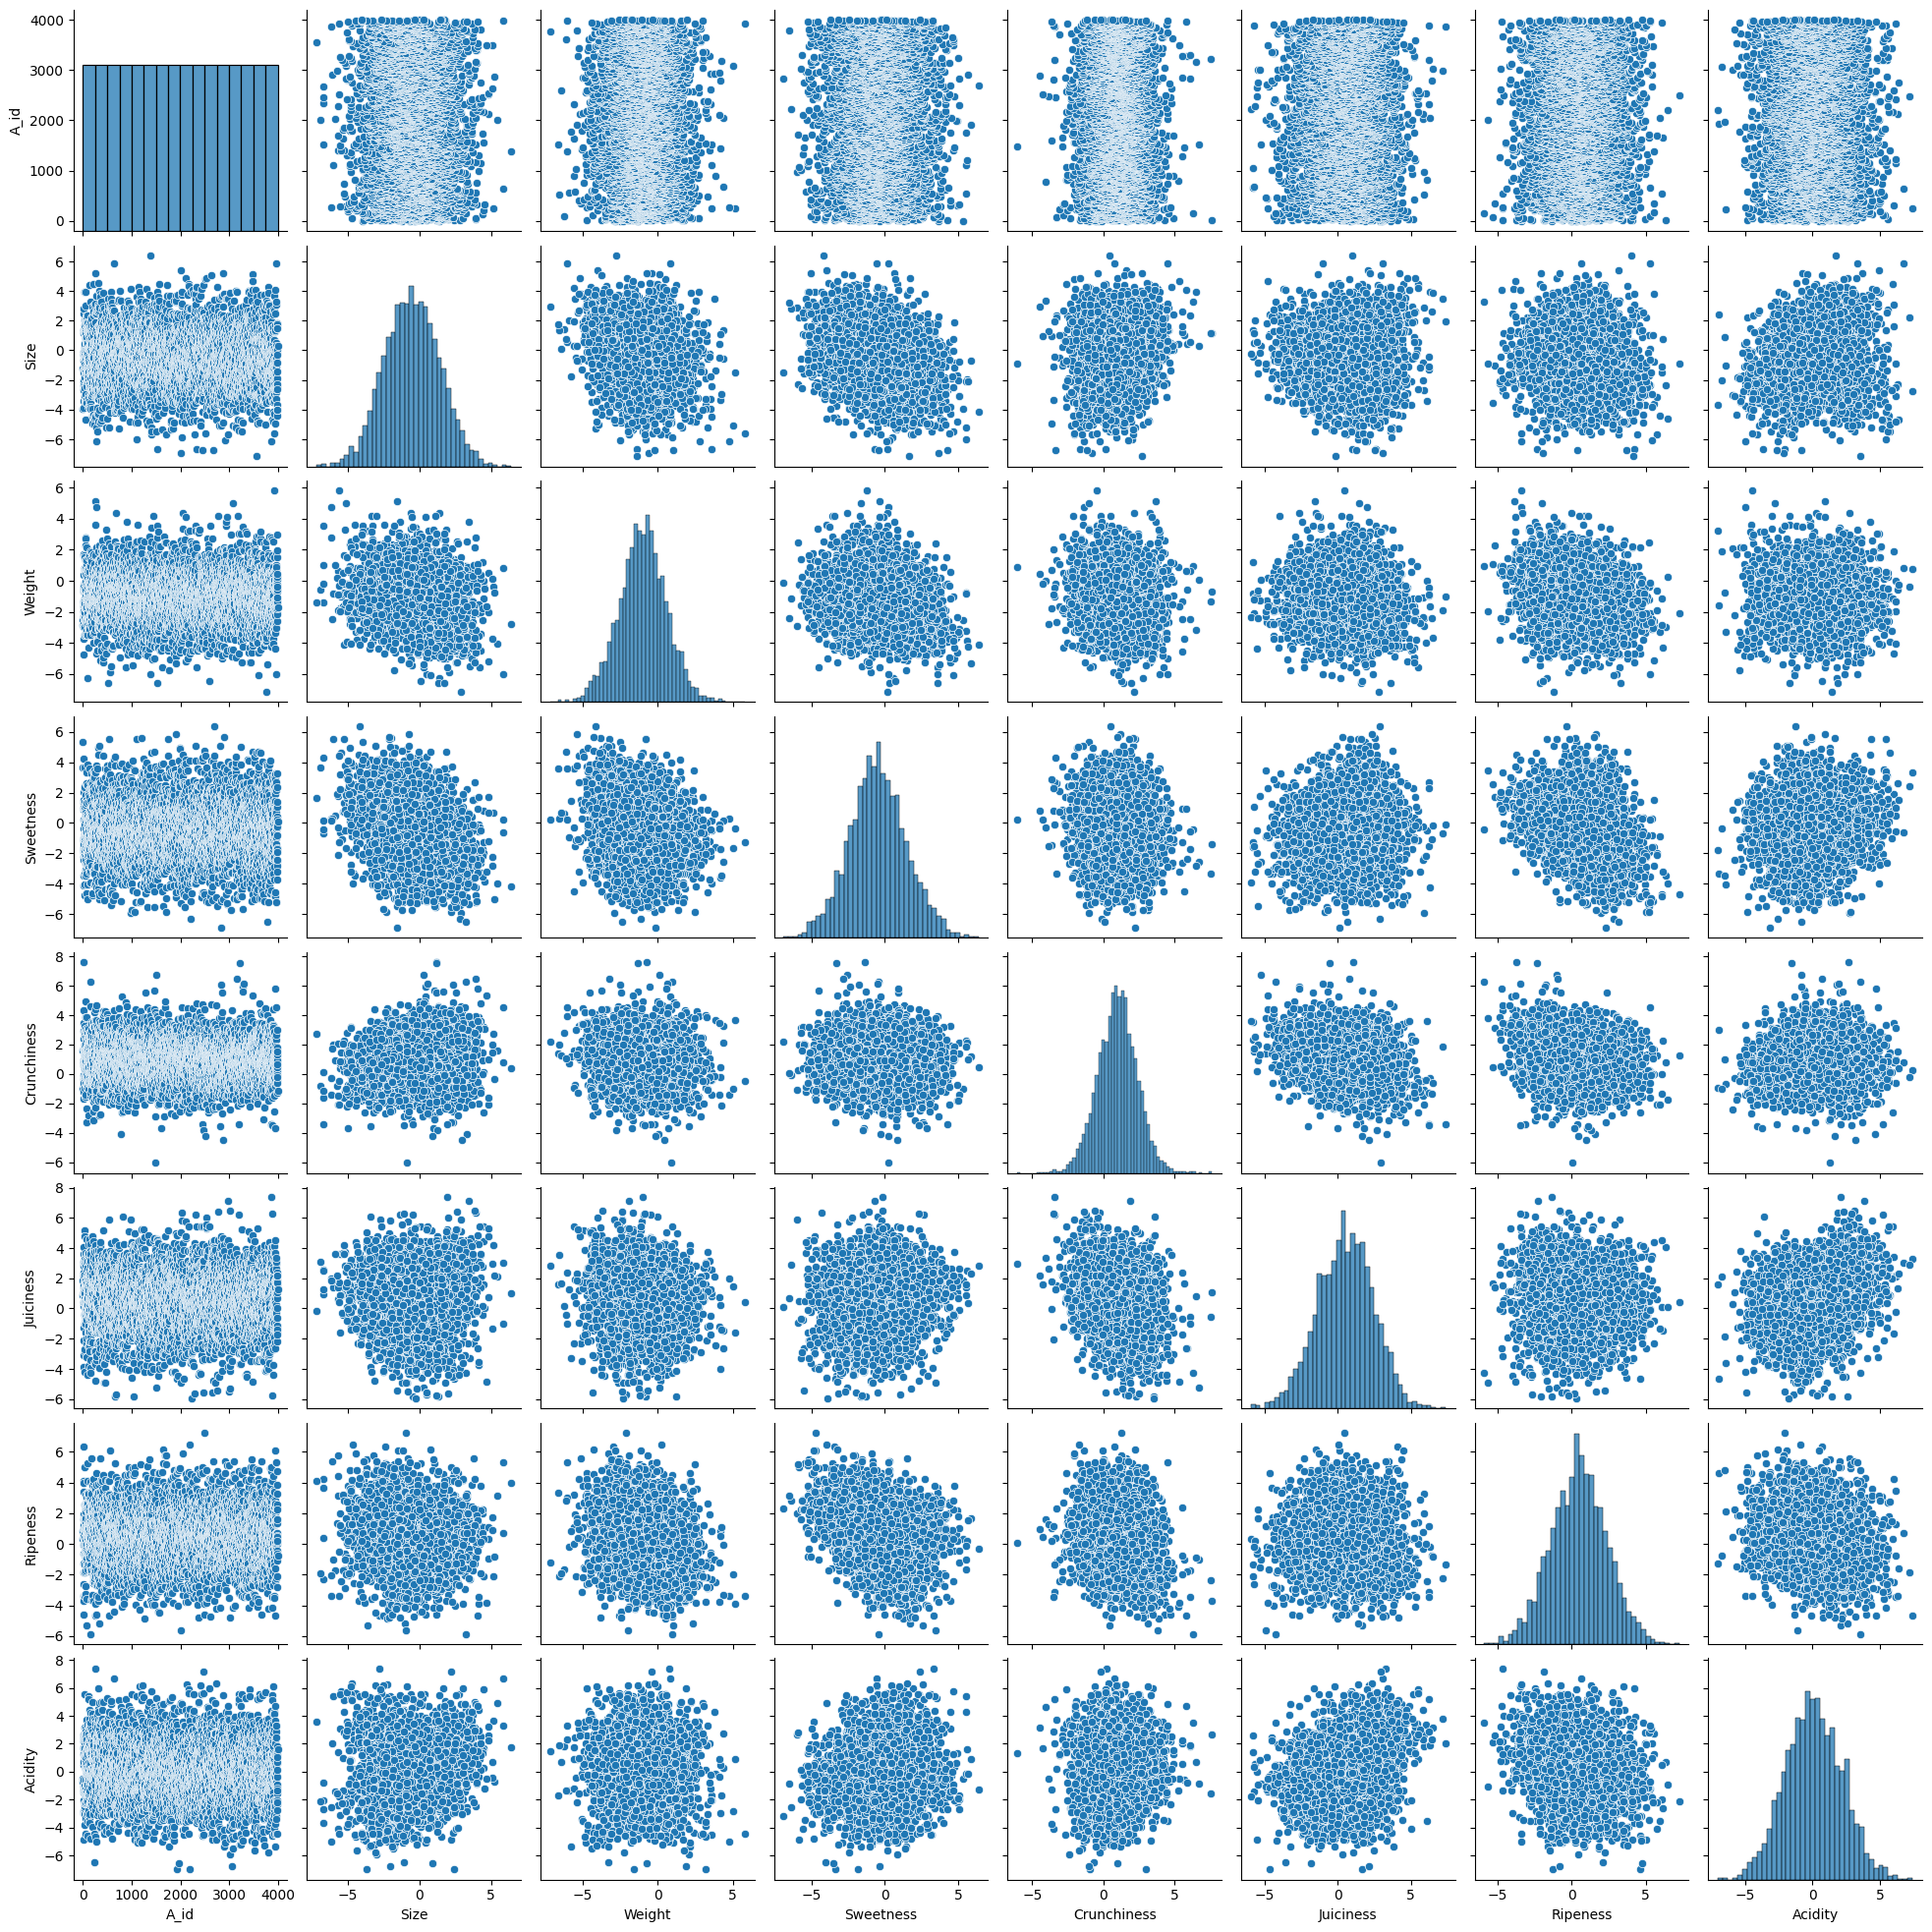

In [ ]:
sns.pairplot(numeric_features)

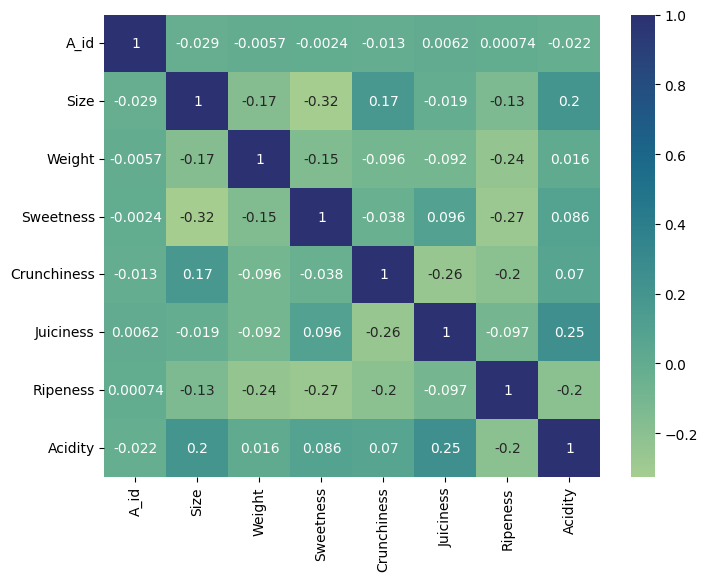

In [ ]:
plt.figure(figsize=(8, 6))
corr_table = numeric_features.corr()
sns.heatmap(corr_table, annot=True, cmap='crest');

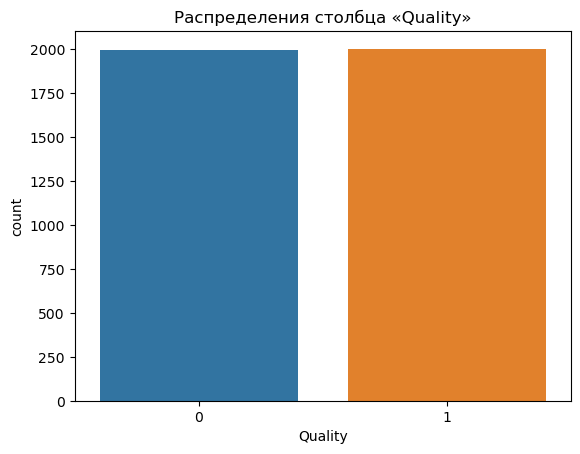

In [ ]:
sns.countplot(x='Quality', data=apples_dataset);
plt.title('Распределения столбца «Quality»');
plt.show()

# Обучение модели

In [66]:
class MLP_clasification:
    def __init__(self, layer_sizes, activation_functions):
        self.layer_sizes = layer_sizes
        self.activation_functions = activation_functions
        self.weights = [np.random.randn(y, x) for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.random.randn(y, 1) for y in layer_sizes[1:]]

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def tanh(self, z):
        return np.tanh(z)

    def tanh_derivative(self, z):
        return 1 - np.tanh(z) ** 2

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0) * 1

    def forward_propagation(self, input_data):
        for b, w, activation in zip(self.biases, self.weights, self.activation_functions):
            if activation == 'sigmoid':
                input_data = self.sigmoid(np.dot(w, input_data) + b)
            elif activation == 'tanh':
                input_data = self.tanh(np.dot(w, input_data) + b)
            elif activation == 'relu':
                input_data = self.relu(np.dot(w, input_data) + b)
        return input_data

    def backpropagation(self, input_data, target):
        gradient_b = [np.zeros(b.shape) for b in self.biases]
        gradient_w = [np.zeros(w.shape) for w in self.weights]

        # Forward
        activation = input_data
        activations = [input_data]
        zs = []

        for b, w, activation_function in zip(self.biases, self.weights, self.activation_functions):
            z = np.dot(w, activation) + b
            zs.append(z)
            if activation_function == 'sigmoid':
                activation = self.sigmoid(z)
            elif activation_function == 'tanh':
                activation = self.tanh(z)
            elif activation_function == 'relu':
                activation = self.relu(z)
            activations.append(activation)

        # Backward
        delta = self.cost_derivative(activations[-1], target) * self.get_activation_derivative(activations[-1], self.activation_functions[-1])
        gradient_b[-1] = delta
        gradient_w[-1] = np.dot(delta, activations[-2].T)

        for l in range(2, len(self.layer_sizes)):
            z = zs[-l]
            activation_derivative = self.get_activation_derivative(z, self.activation_functions[-l])
            delta = np.dot(self.weights[-l + 1].T, delta) * activation_derivative
            gradient_b[-l] = delta
            gradient_w[-l] = np.dot(delta, activations[-l - 1].T)

        return gradient_b, gradient_w

    def get_activation_derivative(self, z, activation_function):
        if activation_function == 'sigmoid':
            return self.sigmoid_derivative(z)
        elif activation_function == 'tanh':
            return self.tanh_derivative(z)
        elif activation_function == 'relu':
            return self.relu_derivative(z)

    def cost_derivative(self, output_activations, target):
        return output_activations - target

    def update_parameters(self, mini_batch, learning_rate):
        sum_gradient_b = [np.zeros(b.shape) for b in self.biases]
        sum_gradient_w = [np.zeros(w.shape) for w in self.weights]

        for x, y in mini_batch:
            delta_gradient_b, delta_gradient_w = self.backpropagation(x, y)
            sum_gradient_b = [nb + dnb for nb, dnb in zip(sum_gradient_b, delta_gradient_b)]
            sum_gradient_w = [nw + dnw for nw, dnw in zip(sum_gradient_w, delta_gradient_w)]

        self.weights = [w - (learning_rate / len(mini_batch)) * nw
                        for w, nw in zip(self.weights, sum_gradient_w)]
        self.biases = [b - (learning_rate / len(mini_batch)) * nb
                       for b, nb in zip(self.biases, sum_gradient_b)]

    def save_parameters(self, filename):
        parameters = {
            'weights': self.weights,
            'biases': self.biases
        }
        with open(filename, 'wb') as file:
            pickle.dump(parameters, file)

    def load_parameters(self, filename):
        with open(filename, 'rb') as file:
            parameters = pickle.load(file)
        self.weights = parameters['weights']
        self.biases = parameters['biases']

In [67]:
X = apples_dataset.drop('Quality', axis=1)
y = apples_dataset['Quality'].values.reshape(-1, 1)

In [68]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.8, shuffle=True, random_state=42)

In [70]:
X_train = [X_train[i].reshape(-1, 1) for i in range(X_train.shape[0])]
y_train = [y_train[i].reshape(-1, 1) for i in range(y_train.shape[0])]
training_data = list(zip(X_train, y_train))

In [71]:
input_size = X.shape[1]
hidden_layers = [10, 5]
output_size = 1

In [72]:
mlp = MLP_clasification([input_size] + hidden_layers + [output_size], ['relu'] * len(hidden_layers) + ['sigmoid'])
learning_rate = 0.01
for epoch in range(20):
    np.random.shuffle(training_data)
    mini_batches = [training_data[k:k+10] for k in range(0, len(training_data), 10)]
    for mini_batch in mini_batches:
        mlp.update_parameters(mini_batch, learning_rate)

In [73]:
def predict(mlp, X):
    predictions = [mlp.forward_propagation(x.reshape(-1, 1)) for x in X]
    return np.array(predictions).squeeze()

In [74]:
predictions = predict(mlp, X_test)
predictions_binary = (predictions > 0.6).astype(int)

# Результат

In [75]:
print("ROC AUC: {:.2f}".format(roc_auc_score(y_test, predictions_binary)))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, predictions_binary)))

ROC AUC: 0.66
Accuracy: 0.66


In [76]:
print(classification_report(y_test, predictions_binary))

              precision    recall  f1-score   support

           0       0.63      0.80      0.71       408
           1       0.71      0.51      0.59       392

    accuracy                           0.66       800
   macro avg       0.67      0.66      0.65       800
weighted avg       0.67      0.66      0.65       800



# Сохранение весов

In [77]:
mlp.save_parameters('model_parameters.pkl')